In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)


In [6]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
x= np.array(df["sorting_time"])


In [8]:
y= df["delivery_time"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1830c4a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1830c4aa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1830588f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1830c4af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1830c5e220>],
 'means': []}

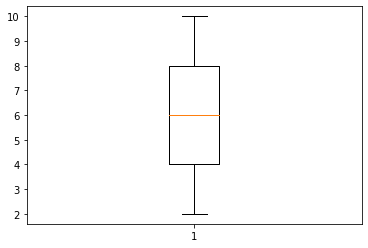

In [9]:
plt.boxplot(df["sorting_time"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1830d49280>,
 'caps': [<matplotlib.lines.Line2D at 0x1830d49820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1830d3af70>],
 'medians': [<matplotlib.lines.Line2D at 0x1830d49dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1830d560d0>],
 'means': []}

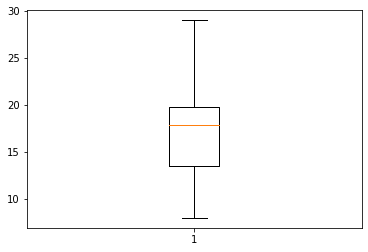

In [10]:
plt.boxplot(df["delivery_time"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


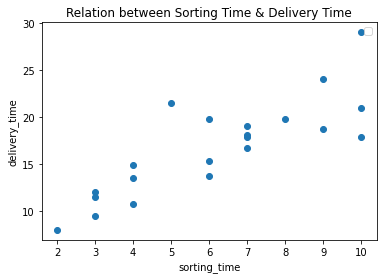

In [11]:
plt.scatter(x,y)
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("Relation between Sorting Time & Delivery Time")
plt.legend()
plt.show()

In [12]:
x

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [13]:
X = x.reshape(-1,1)

In [14]:
X.shape

(21, 1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [16]:
model.coef_

array([1.6490199])

In [17]:
model.intercept_

6.58273397199706

In [18]:
y_pred = model.predict(X)

In [19]:
pd.DataFrame({"Actual":y,"Predicted":y_pred,"Residual":y-y_pred})

,Actual,Predicted,Residual
0,21.00,23.072933,-2.072933
1,13.50,13.178814,0.321186
2,19.75,16.476853,3.273147
3,24.00,21.423913,2.576087
4,29.00,23.072933,5.927067
5,15.35,16.476853,-1.126853
6,19.00,18.125873,0.874127
7,9.50,11.529794,-2.029794
8,17.90,23.072933,-5.172933
9,18.75,21.423913,-2.673913


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
mse

7.793311548584063

In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
r2

0.6822714748417231

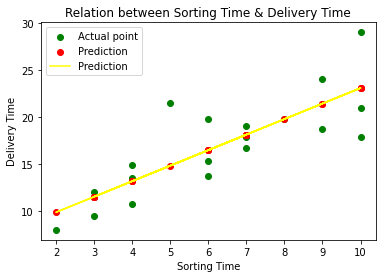

In [22]:
plt.scatter(X,y,label="Actual point",color="green")
plt.scatter(X,y_pred,label="Prediction",color="red")
plt.plot(X,y_pred,label="Prediction",color="yellow")

plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Relation between Sorting Time & Delivery Time")
plt.legend()
plt.show()